<center>

# Курс "Основы Python для анализа данных"

## Артамонов Игорь Михайлович
## Факультет "Прикладная математика" МАИ

### Практическое № 5.  Ввод и вывод. Работа с реляционными базами данных.

</center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие 5. Ввод и вывод. Реляционные базы данных.</b>
       * 

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Общее

* В Python присутсвует ввод-вывод, аналогичный другим императивным языкам программирования
* Однако, в подавляющем __большинстве случаев__, используются __специфические__ для конкретной области средства ввода-вывода
* При анализе задачи __ввода__, целесообразно ответить на следующие вопросы:
    - что нам надо ввести
    - где мы это будем использовать
    - в каком формате хранятся данные во входном файле
    - в какой формат они загружаются в программе
    - в каком формате нам их удобно будет использовать
* При анализе задачи __вывода__ вопросы похожи, но последовательность близка к обратной:
    - в каком формате мы имеем данные после обработки
    - какова цель сохранения
    - какие средства сохранения в нужный нам тип есть
    - из какого формата сохраняет данное средство ввода-вывода
* Работа с табличными данными - одна из сильных сторон Python, в том числе - благодаря вводу-выводу

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

In [2]:
import os
import os.path

### Загрузка файлов из внешних источников

In [5]:
!curl http://shakespeare.mit.edu/lear/full.html -o Lesson_05_files/kinglear.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  290k    0  290k    0     0   356k      0 --:--:-- --:--:-- --:--:--  356k


### Ввод из файлов

In [3]:
kinglear = 'Lesson_05_files/kinglear.txt'
file1 = open(kinglear,"r")

In [4]:
!pwd

/Users/andreytretyakov/PycharmProjects/PythonCourse


In [5]:
%pwd

'/Users/andreytretyakov/PycharmProjects/PythonCourse'

In [6]:
%ls -la

total 12200
drwxr-xr-x  17 andreytretyakov  staff      544  8 ноя 16:20 ./
drwxr-xr-x   5 andreytretyakov  staff      160  6 ноя 20:59 ../
-rw-r--r--@  1 andreytretyakov  staff     6148  7 ноя 19:25 .DS_Store
drwxr-xr-x   8 andreytretyakov  staff      256  6 ноя 20:45 .idea/
drwxr-xr-x   6 andreytretyakov  staff      192 23 окт 15:24 .ipynb_checkpoints/
-rw-r--r--@  1 andreytretyakov  staff   229341 28 сен 16:18 Data_intrpl_aprox_info.ipynb
-rw-r--r--@  1 andreytretyakov  staff    45541 13 сен 07:52 Lesson_01.ipynb
-rw-r--r--@  1 andreytretyakov  staff    90314  9 окт 16:59 Lesson_02.ipynb
-rw-r--r--@  1 andreytretyakov  staff    51355  9 окт 17:07 Lesson_03.ipynb
-rw-r--r--@  1 andreytretyakov  staff   287611  6 ноя 21:00 Lesson_04.ipynb
drwxr-xr-x   4 andreytretyakov  staff      128  6 ноя 20:59 Lesson_04_files/
-rw-r--r--@  1 andreytretyakov  staff  3009017  8 ноя 16:20 Lesson_05.ipynb
drwxr-xr-x   9 andreytretyakov  staff      288  8 ноя 15:53 Lesson_05_files/
-rw-r--r--   1 andrey

In [7]:
path = 'Lesson_05_files'
name = 'kinglear.txt'
finename = os.path.join(path, name)
file = open(finename,"r")

In [8]:
file.name

'Lesson_05_files/kinglear.txt'

In [9]:
file.mode

'r'

In [10]:
content=file.read()
print(content)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
 "http://www.w3.org/TR/REC-html40/loose.dtd">
 <html>
 <head>
 <title>King Lear: Entire Play
 </title>
 <meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">
 <LINK rel="stylesheet" type="text/css" media="screen"
       href="/shake.css">
 </HEAD>
 <body bgcolor="#ffffff" text="#000000">

<table width="100%" bgcolor="#CCF6F6">
<tr><td class="play" align="center">King Lear
<tr><td class="nav" align="center">
      <a href="/Shakespeare">Shakespeare homepage</A> 
    | <A href="/lear/">King Lear</A> 
    | Entire play
</table>

<H3>ACT I</h3>
<h3>SCENE I. King Lear's palace.</h3>
<p><blockquote>
<i>Enter KENT, GLOUCESTER, and EDMUND</i>
</blockquote>

<A NAME=speech1><b>KENT</b></a>
<blockquote>
<A NAME=1.1.1>I thought the king had more affected the Duke of</A><br>
<A NAME=1.1.2>Albany than Cornwall.</A><br>
</blockquote>

<A NAME=speech2><b>GLOUCESTER</b></a>
<blockquote>
<A NAME=1.1.3>It did always seem so

In [11]:
len(content)

297568

In [12]:
content[:110]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"\n "http://www.w3.org/TR/REC-html40/loose.dtd">\n <'

In [13]:
file.close()

### Использование with

In [14]:
with open(finename,"r") as file:
    l=file.read(10)
    print('1:', l)
    l=file.read(20)
    print('2:', l)
    l=file.read(30)
    print('3:', l)


1: <!DOCTYPE 
2: HTML PUBLIC "-//W3C/
3: /DTD HTML 4.0 Transitional//EN


## <font color=red>ЗАДАНИЕ</font>

Введите первые 5 строк файла, распечатайте и выведите в файл с именем 'myfile1.txt'

In [15]:
## Ваш код ниже
path = 'Lesson_05_files'
name = 'myfile1.txt'
finename = os.path.join(path, name)
strings = ["Hello file\n", "File practice lesson5\n", "ooga booga apapapia apapapa\n", "4th string\n", "5th string\n"] 
with open(finename,"w+") as file: 
    for line in strings:
        file.write(line)
    file.seek(0)
    print(file.readlines())

['Hello file\n', 'File practice lesson5\n', 'ooga booga apapapia apapapa\n', '4th string\n', '5th string\n']


### Сериализованный ввод/вывод. Pickle

* Протокол pickle зависит от Python
* нет гарантий совместимости между разными версиями Python
* нет гарантий совместимости с другими языками программирования
* не все структуры данных Python можгут быть сериализованы pickle

In [16]:
import pickle

In [17]:
pickle_name = 'Lesson_05_files/city.pickle'

In [18]:
data = {}
data['Москва'] = [16, 27, 15, 22],
data['Санкт-Петербург'] = [11, 19, 29, 5],
data['Нососибирск'] = [2, 23, 3, 15],
data['Томск'] = [8, 9, 10, 7],
data['Верхний Волочок'] = [96, 5, 6, 74]
data

{'Москва': ([16, 27, 15, 22],),
 'Санкт-Петербург': ([11, 19, 29, 5],),
 'Нососибирск': ([2, 23, 3, 15],),
 'Томск': ([8, 9, 10, 7],),
 'Верхний Волочок': [96, 5, 6, 74]}

In [19]:
with open(pickle_name, 'wb') as f:
     pickle.dump(data, f)

In [20]:
with open(pickle_name, 'rb') as f:
     new_data = pickle.load(f)

In [21]:
print(new_data)

{'Москва': ([16, 27, 15, 22],), 'Санкт-Петербург': ([11, 19, 29, 5],), 'Нососибирск': ([2, 23, 3, 15],), 'Томск': ([8, 9, 10, 7],), 'Верхний Волочок': [96, 5, 6, 74]}


In [22]:
# Посмотрим внутрь файла
file = open(pickle_name,"r")
content=file.read()
print(content)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

### В чём проблема?

In [23]:
bytes_read = open(pickle_name, "rb").read()
print(bytes_read )

b'\x80\x04\x95\xbe\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x0c\xd0\x9c\xd0\xbe\xd1\x81\xd0\xba\xd0\xb2\xd0\xb0\x94]\x94(K\x10K\x1bK\x0fK\x16e\x85\x94\x8c\x1d\xd0\xa1\xd0\xb0\xd0\xbd\xd0\xba\xd1\x82-\xd0\x9f\xd0\xb5\xd1\x82\xd0\xb5\xd1\x80\xd0\xb1\xd1\x83\xd1\x80\xd0\xb3\x94]\x94(K\x0bK\x13K\x1dK\x05e\x85\x94\x8c\x16\xd0\x9d\xd0\xbe\xd1\x81\xd0\xbe\xd1\x81\xd0\xb8\xd0\xb1\xd0\xb8\xd1\x80\xd1\x81\xd0\xba\x94]\x94(K\x02K\x17K\x03K\x0fe\x85\x94\x8c\n\xd0\xa2\xd0\xbe\xd0\xbc\xd1\x81\xd0\xba\x94]\x94(K\x08K\tK\nK\x07e\x85\x94\x8c\x1d\xd0\x92\xd0\xb5\xd1\x80\xd1\x85\xd0\xbd\xd0\xb8\xd0\xb9 \xd0\x92\xd0\xbe\xd0\xbb\xd0\xbe\xd1\x87\xd0\xbe\xd0\xba\x94]\x94(K`K\x05K\x06KJeu.'


In [24]:
# Заодно создадим свой генератор
def bytes_from_file(filename, chunksize=8192):
    with open(filename, "rb") as f:
        while True:
            chunk = f.read(chunksize)
            if chunk:
                for b in chunk:
                    yield b
            else:
                break

byte_no = 0
num_of_bytes = 16
for b in bytes_from_file(pickle_name, chunksize=32):
    print(f"#{byte_no:03d} - {b:02x}")
    byte_no += 1
    if byte_no > num_of_bytes:
        break

#000 - 80
#001 - 04
#002 - 95
#003 - be
#004 - 00
#005 - 00
#006 - 00
#007 - 00
#008 - 00
#009 - 00
#010 - 00
#011 - 7d
#012 - 94
#013 - 28
#014 - 8c
#015 - 0c
#016 - d0


## <font color=red>ЗАДАНИЕ</font>

Создайте случайный массив numpy размером $10 x 10$, запишите его в виде pickle и заново считайте в другую переменную. Выведите среднее суммы квадратов разницы между массивом и им же, но транспонированным.

In [25]:
# Ваш код
array = np.random.randint(100, size=(10,10))
pickle_name = 'Lesson_05_files/arra.pickle'
with open(pickle_name, 'wb') as f:  
    pickle.dump(array, f)
with open(pickle_name, 'rb') as f:  
    new_array = pickle.load(f)

np.sum((array - new_array.T)**2) / np.size(array)

1455.62

### Загрузка и открытие файлов из Интернет (URL)

In [26]:
import urllib
import urllib.request

In [27]:
with urllib.request.urlopen('http://lib.ru/LITRA/PUSHKIN/p4.txt') as url:
    i = 0
    if i < 4:
        print(url.readline())

b'<html><head><title>\xe1\xcc\xc5\xcb\xd3\xc1\xce\xc4\xd2 \xf3\xc5\xd2\xc7\xc5\xc5\xd7\xc9\xde \xf0\xd5\xdb\xcb\xc9\xce. \xe4\xd2\xc1\xcd\xc1\xd4\xc9\xde\xc5\xd3\xcb\xc9\xc5 \xd0\xd2\xcf\xc9\xda\xd7\xc5\xc4\xc5\xce\xc9\xd1</title></head><body><pre><div align=right><form action=/LITRA/PUSHKIN/p4.txt><select name=format><OPTION VALUE="_Contents">\xf3\xcf\xc4\xc5\xd2\xd6\xc1\xce\xc9\xc5<OPTION VALUE="_with-big-pictures.html">Fine HTML<OPTION VALUE="_with-big-pictures.html">Printed version<OPTION VALUE="_Ascii.txt">txt(Word,\xeb\xf0\xeb)<OPTION VALUE="">Lib.ru html</select><input type=submit value=go></form></div><pre>\n'


In [28]:
from html.parser import HTMLParser

In [29]:
with urllib.request.urlopen('http://www.gutenberg.org/files/1532/1532-0.txt') as url:
    i = 0
    for line in url:
        print(line)
        if i > 4:
            break
        else:
            i +=1

b'\xef\xbb\xbf\r\n'
b'Project Gutenberg\xe2\x80\x99s King Lear, by William Shakespeare\r\n'
b'\r\n'
b'This eBook is for the use of anyone anywhere in the United States and\r\n'
b'most other parts of the world at no cost and with almost no restrictions\r\n'
b'whatsoever.  You may copy it, give it away or re-use it under the terms\r\n'


## <font color=red>ЗАДАНИЕ</font>

Преобразуйте файл в список строк с удалением форматирования так, что в каждом элементе 
списка - только строка. Если строка пустая, то она должна сохраняться пустой строкой.

In [30]:
# Ваш код
str_list = []
with urllib.request.urlopen('http://www.gutenberg.org/files/1532/1532-0.txt') as url:
    i = 0
    for line in url:
        str_list.append(line.decode('utf-8-sig').replace('\r\n', ''))
        if i > 4:
            break
        else:
            i +=1
str_list

['',
 'Project Gutenberg’s King Lear, by William Shakespeare',
 '',
 'This eBook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever.  You may copy it, give it away or re-use it under the terms']

## Использование даты и времени

* date — работа только с датой
* time — работа со временем (независимо от дня) (Hour, minute, second, microsecond)
* DateTime — Комбинация даты и времени (Month, day, year, hour, second, microsecond)
* time delta — работа с временными разницами
* tzinfo — работа с временными зонами

In [31]:
from datetime import date
from datetime import time
# !!
from datetime import datetime
from datetime import timedelta
from datetime import tzinfo

In [32]:
d = date.today()
d

datetime.date(2020, 11, 8)

In [33]:
d.day, d.month, d.year

(8, 11, 2020)

In [34]:
dt = datetime.today()
dt

datetime.datetime(2020, 11, 8, 16, 28, 27, 635304)

In [35]:
dt.day, dt.month, dt.year

(8, 11, 2020)

In [36]:
dt.hour, dt.minute, dt.second, dt.microsecond

(16, 28, 27, 635304)

In [37]:
tt = dt.timetuple()
for it in tt:
    print(it)

2020
11
8
16
28
27
6
313
-1


In [38]:
td = timedelta(days=700, hours=14, minutes=24)
td

datetime.timedelta(days=700, seconds=51840)

In [39]:
year = timedelta(days=365)
another_year = timedelta(weeks=40, days=84, hours=23, minutes=50, seconds=600)

In [40]:
year.total_seconds()

31536000.0

In [41]:
year == another_year

True

In [42]:
dt - year

datetime.datetime(2019, 11, 9, 16, 28, 27, 635304)

#### Вывод даты и времени

In [43]:
dt.strftime("%A, %d. %B %Y %I:%M%p")

'Sunday, 08. November 2020 04:28PM'

### Выведите количество (1) дней, (2) месяцев прошедшее с запуска первого искусственного спутника земли <br>(4 октября 1957)

In [44]:
## Ваш код
launch_day = date(1954, 10, 4)
delta = date.today() - launch_day
print(f"Days: {delta.days}, months: {delta.days // 30}")

Days: 24142, months: 804


### JSON

* Популярный формат, пришедший из JavaScript
* Поддерживает меньше форматов, чем pickle
* Обеспечивает совместимость между языками программирования

In [45]:
import json

#### Соответствие типов данных в JSON и Python 3
| JSON | PYTHON 3  |
|--- |--- |
| object | dict |
| array | list |
| string | string |
| integer | integer |
| real number | float |
| true | True |
| false | False |
| null | None|

In [ ]:
json.dumps(data)

In [ ]:
data

```python
{
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": ["running", "sky diving", "singing"],
    "age": 35,
    "children": [
        {
            "firstName": "Alice",
            "age": 6
        },
        {
            "firstName": "Bob",
            "age": 8
        }
    ]
}
```

In [ ]:
with open("data.json", "w") as write_file:
    json.dump(data, write_file)

In [ ]:
!ls data.*

In [ ]:
%ls data.*

In [ ]:
with open("data.json", "r") as read_file:
    decoded = json.load(read_file)
    
decoded

### Модуль io

* работа с потоковым вводом-выводом
* типы потоков вводв/вывода:
    - текстовый
    - двоичный
    - небуфферизованый (raw)

In [46]:
import io

In [47]:
f = open("Lesson_05_files/myfile1.txt", "r", encoding="utf-8")

In [48]:
f = io.StringIO("some initial text data\nsome other data")

In [49]:
for c in f:
    print(c)

some initial text data

some other data


In [50]:
b = io.BytesIO(b"some initial binary data: \x00\x01")
view = b.getbuffer()
view[3:6] = b"345"
b.getvalue()


b'som345nitial binary data: \x00\x01'

In [51]:
f = open(os.path.join('practice01_pics/', 'rembrandt.jpg'), "rb", buffering=0)

In [52]:
for i in range(10):
    print(f.read())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x02\x00\x1c\x00\x1c\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x04\xa6\x03\xf0\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x07\x00\x08\t\xff\xc4\x00J\x10\x00\x01\x03\x03\x02\x04\x04\x04\x04\x04\x06\x01\x04\x00\x00\x0f\x01\x02\x03\x04\x00\x05\x11\x12!\x06\x131A\x14"Qa\x072q\x81\x15#B\x913R\xa1\xb1\x08\x16$b\xc1\xd1\xe1Cr\xf0\xf1%\x174S\x82\x92\tD\x1

### Почему такой вывод?

In [ ]:
#В режиме байтового чтения открыли 

### Ввод / вывод изображений

In [53]:
image_path = os.path.join('practice01_pics/', 'rembrandt.jpg')
image = plt.imread(image_path, format=None)

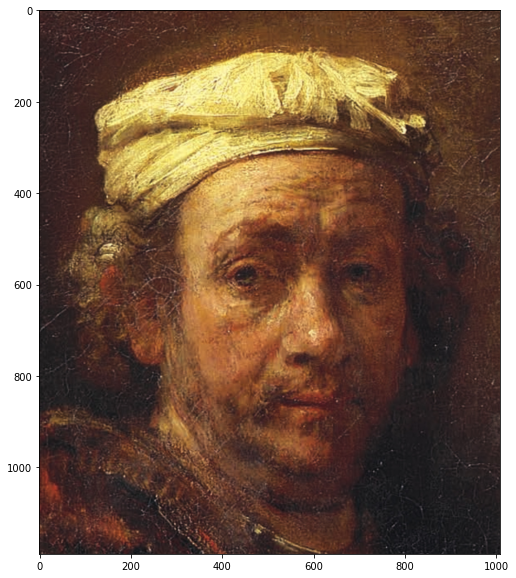

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(image);

## <font color=red>ЗАДАНИЕ</font>

Нарисуйте квадрат черного цвета с толщиной линии $5$ и размерами $100 x 100$ по внешним границам с центром в геометрическом центре картины. Выведите получившееся изображение на экран. Код черного цвета - $0$

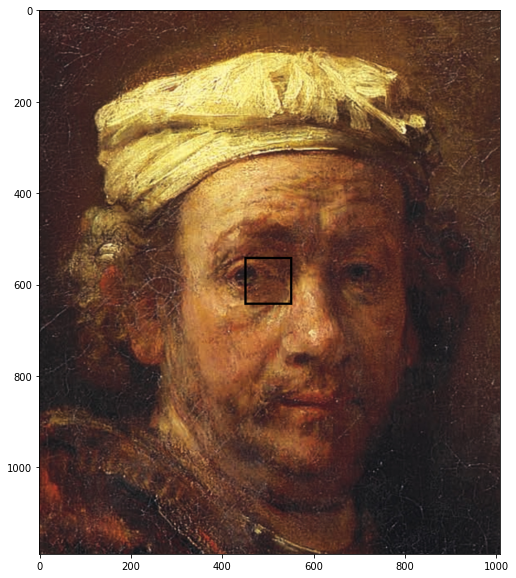

In [55]:
### Ваш код
img_cp = image.copy()
img_cp[img_cp.shape[0] // 2 - 50 - 5 : img_cp.shape[0] // 2 + 50, img_cp.shape[1] // 2 - 50 - 5 : img_cp.shape[1] // 2 - 50] = 0
img_cp[img_cp.shape[0] // 2 - 50 - 5 : img_cp.shape[0] // 2 + 50, img_cp.shape[1] // 2 + 50 - 5 : img_cp.shape[1] // 2 + 50] = 0
img_cp[img_cp.shape[0] // 2 - 50 - 5 : img_cp.shape[0] // 2 - 50, img_cp.shape[1] // 2 - 50 - 5 : img_cp.shape[1] // 2 + 50] = 0
img_cp[img_cp.shape[0] // 2 + 50 - 5 : img_cp.shape[0] // 2 + 50, img_cp.shape[1] // 2 - 50 - 5 : img_cp.shape[1] // 2 + 50] = 0
#img_cp[img_cp.shape[0] // 2 + 50 - 5 : img_cp.shape[0] // 2 + 50 + 5, img_cp.shape[1] // 2 + 50 - 5 : img_cp.shape[1] // 2 + 50 + 5] = 0
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(img_cp);

### Работа с SQL-базой данных

In [56]:
import sqlite3
from sqlite3 import Error

In [ ]:
conn = sqlite3.connect("my.db")

In [ ]:
create_table_req = """CREATE TABLE person 
    (firstname varchar(15), 
     lastname varchar(20), 
     age number(3), 
     address varchar(30), 
     city varchar(20));"""

In [ ]:
cursor = conn.cursor()

In [ ]:
conn.execute(create_table_req)

In [ ]:
insert_table_req = """INSERT INTO person
    (firstname,  lastname, age, address, city)
    VALUES ("{}", "{}", {}, "{}", "{}")
""" 
conn.execute(insert_table_req.format('Диего', 'Мендес', 25, 'Москва, Братиславская ул., 26, 178', 'Москва'))

In [ ]:
insert_table_req.format('Диего', 'Мендес', 25, 173655, 'Москва, Братиславская ул., 26, 178', 'Москва')

In [ ]:
cursor.execute("SELECT * FROM person")
rows = cursor.fetchall()
 
for row in rows:
    print(row)

In [ ]:
conn = sqlite3.connect(':memory:')

In [ ]:
conn.execute('DROP TABLE person')

## <font color=red>ЗАДАНИЕ</font>

Введите данные из файла по продажам авокадо в массив numpy . После этого вычислите средние значения всех столбцов средствами numpy и средствами SQL

Путь к файлу <i>datasets/Avocado Prices/avocado.csv</i><br><br>

Либо его можно скачать по ссылке на kaggle.com:<br>
https://www.kaggle.com/neuromusic/avocado-prices/

In [57]:
# Ваш код

data = pd.read_csv("Lesson_05_files/avocado.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [58]:
data_numpy = data.iloc[:, 1:-2].select_dtypes(include=np.number).dropna(axis='rows').to_numpy()
np.mean(data_numpy, axis=0)

array([1.40597841e+00, 8.50644013e+05, 2.93008425e+05, 2.95154568e+05,
       2.28397360e+04, 2.39639202e+05, 1.82194687e+05, 5.43380881e+04,
       3.10642651e+03])

In [59]:
connect_n = sqlite3.connect("Lesson_05_files/my.db")
data.to_sql("Avocado", connect_n, if_exists='replace', index=False)
cursor_n = connect_n.cursor()

/Users/andreytretyakov/.local/share/virtualenvs/PythonCourse-15oCSDCF/lib/python3.8/site-packages/pandas/core/generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [60]:
cursor_n.execute("SELECT AVG(AveragePrice) From Avocado")
cursor_n.fetchall()

[(1.4059784097758825,)]